# Twitter Sentiment Analysis

kaggle's dataset

**Objective:**
<br/>
The task is to build a model that will determine the tone (neutral, positive, negative) of the text. To do this, you will need to train the model on the existing data (train.csv). The resulting model will have to determine the class (neutral, positive, negative) of new texts (test data that were not used to build the model) with maximum accuracy.

Note (Sentiment):
<br/> 1-positive <br/> 0-negative

## Importing Libraries and Data

In [2]:
# importing relevant libraries

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
# importing the dataset

train = pd.read_csv("train.csv", encoding="ISO-8859-1")
test = pd.read_csv("test.csv", encoding="ISO-8859-1")

In [7]:
train.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [10]:
train['SentimentText'][400]

" 1 week before the palm pre comes out and my centro dies. I have a temp phone but my contacts aren't transfered yet. #sadpanda #fb"

In [11]:
# check dataset - inspection

# inspecting negative tweets
display(train[train['Sentiment']==0].head(10))

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
7,8,0,Sunny Again Work Tomorrow :-| ...
10,11,0,I must think about positive..
12,13,0,this weekend has sucked so far
13,14,0,jb isnt showing in australia any more!
14,15,0,ok thats it you win.


In [12]:
#inspecting positive tweets
display(train[train['Sentiment']==1].head(10))

,ItemID,Sentiment,SentimentText
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
17,18,1,Feeling strangely fine. Now I'm gonna go l...
22,23,1,You're the only one who can see this cause...
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,39,1,uploading pictures on friendster
41,42,1,(: !!!!!! - so i wrote something last week. ...


In [13]:
# check dimensions of dataset

train.shape, test.shape

((99989, 3), (299989, 2))

**Train** dataset has 99989 tweets and <br/> **Test** dataset has 299989 tweets.

In [14]:
train['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In the train dataset, we have 56,457 tweets labeled as positive tweets and 43,532 tweets labeled as negative. It is an approximately similar in proportion. 

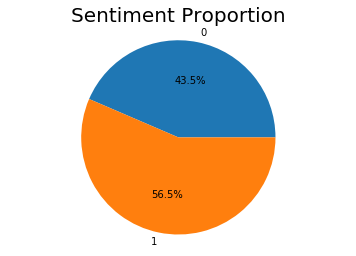

In [15]:
labels = ['0', '1']
sizes = [train['Sentiment'].value_counts()[0],
         train['Sentiment'].value_counts()[1]
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title('Sentiment Proportion', fontsize=20)
plt.show()

Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

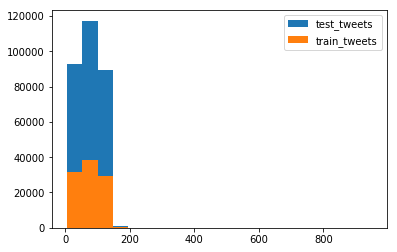

In [16]:
length_train = train['SentimentText'].str.len()
length_test = test['SentimentText'].str.len()


plt.hist(length_test, bins=20, label="test_tweets")
plt.hist(length_train, bins=20, label="train_tweets")
plt.legend()
plt.show()

The tweet-length distribution is more or less the same in both train and test data.

In [17]:
lens = train.SentimentText.str.len()
lens.mean(), lens.std(), lens.max()

(77.26430907399813, 36.38263943108186, 949)

## Text Processing and Cleaning

<h4>StopWords</h4>
<br/>We can ignore words of no importance like conjunctions, adjective, etc, to make our input data much more meaningful to the algorithm. NLTK provides inbuilt corpus with stopwords to filer out them

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.']


In [21]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
from nltk.corpus import stopwords
train.SentimentText = [w for w in train.SentimentText if w.lower() not in stopwords.words('english')]

## Stemmer

A word stem is part of a word. It is sort of a normalization idea, but linguistic. Given words, NLTK can find the stems.

<img src="https://zir0-93.github.io/images/stem2.svg">

In [23]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
 
words = ["game","gaming","gamed","games"]
stemmer = PorterStemmer()
 
for word in words:
    print(stemmer.stem(word))

game
game
game
game


In [24]:
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted'] 
for word in plurals:
    print(stemmer.stem(word))

caress
fli
die
mule
deni
die
agre
own
humbl
size
meet
state
siez
item
sensat
tradit
refer
colon
plot


In [25]:
#nltk.download("wordnet")
ps = nltk.PorterStemmer()
train.SentimentText = [ps.stem(l) for l in train.SentimentText]

## Split Test and Train

In [26]:
X = train.SentimentText
y = train.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [28]:
train1 = pd.concat([X_train,y_train], axis=1)
train1.shape

(79991, 2)

## Tokenization

The goal of tokenization is to break up a sentence or paragraph into specific tokens or words. We basically want to convert human language into a more abstract representation that computers can work with.

Sometimes you want to split sentence by sentence and other times you just want to split words.

In [29]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s):
    return re_tok.sub(r' \1 ', s).split()

## Ngrams

In [30]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 2
bigrams = ngrams(sentence.split(), n)
for grams in bigrams:
  print (grams)

('this', 'is')
('is', 'a')
('a', 'foo')
('foo', 'bar')
('bar', 'sentences')
('sentences', 'and')
('and', 'i')
('i', 'want')
('want', 'to')
('to', 'ngramize')
('ngramize', 'it')


## Term Frequency-Inverse Document Frequency (TF-IDF)

Term-frequency-inverse document frequency (TF-IDF) is another way to judge the topic of an article by the words it contains. With TF-IDF, words are given weight – TF-IDF measures relevance, not frequency. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.

First, TF-IDF measures the number of times that words appear in a given document (that’s term frequency). But because words such as “and” or “the” appear frequently in all documents, those are systematically discounted. That’s the inverse-document frequency part. The more documents a word appears in, the less valuable that word is as a signal. That’s intended to leave only the frequent AND distinctive words as markers. Each word’s TF-IDF relevance is a normalized data format that also adds up to one.

<img src="https://skymind.ai/images/wiki/tfidf.png">

In [31]:
n = train1.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), #The lower and upper boundary of the range of n-values for different n-grams
                      tokenizer=tokenize,
                      min_df=3,      # ignore terms that have a df strictly lower than threshold
                      max_df=0.9,    #ignore terms that have a df strictly higher than threshold (corpus-specific stop words)
                      strip_accents='unicode', #Remove accents during the preprocessing step
                      use_idf=1,
                      smooth_idf=1,  #Smooth idf weights by adding one to document frequencies, 
                                     #as if an extra document was seen containing every term in 
                                     #the collection exactly once. Prevents zero divisions.
                      sublinear_tf=1, #Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
                      max_features=40000
                     )
trn_term_doc = vec.fit_transform(train1['SentimentText'])
test_term_doc = vec.transform(X_test)

In [32]:
#This creates a sparse matrix with only a small number of non-zero elements (stored elements in the representation below).
trn_term_doc, test_term_doc

(<79991x40000 sparse matrix of type '<class 'numpy.float64'>'
 	with 2023093 stored elements in Compressed Sparse Row format>,
 <19998x40000 sparse matrix of type '<class 'numpy.float64'>'
 	with 494592 stored elements in Compressed Sparse Row format>)

In [33]:
#Here's the basic naive bayes feature equation:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    
    return (p+1) / ((y==y_i).sum()+1)

In [39]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=3,solver='newton-cg')
    x_nb = x.multiply(r)
    
    return m.fit(x_nb, y), r

In [35]:
x = trn_term_doc
test_x = test_term_doc

label_cols=['Sentiment']
preds = np.zeros((len(X_test), len(label_cols)))
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [36]:
for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train1[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit Sentiment


In [37]:
y_pred=pd.DataFrame(preds.round(decimals=0), columns = label_cols)

In [38]:
accuracy_score(y_test, y_pred)

0.7943294329432943